In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal  # to gain probability density function

# Problem 1

In [5]:
X = pd.read_csv('hw3-data/Prob1_X.csv')
y = pd.read_csv('hw3-data/Prob1_y.csv')

In [306]:
class AdaBoost():
    """Implements adaboost methods in the class.
    
    Includes getting training model, calculate epsilon and corresponding alpha, and so on.
    """
    def __init__(self, X, y):
        self.X = X.values
        self.y = y.values.T[0]
        self.n = self.X.shape[0]
        self.weight = np.ones(self.n) / self.n
        self.weight_list = []
        self.weight_hat = np.zeros(self.n)
        self.w_list = []
        self.alpha_list = []
        self.epsilon_list = []
        self.training_error_list = []
        self.upper_bound_list = []
        self.f_boost = 0
        self.sum_eps = 0
        
    def generate(self):
        ind = np.random.choice(self.n, self.n, replace=True, p=self.weight)
        self.X_train = self.X[ind, :]
        self.y_train = self.y[ind]
        
    def train(self):
        inv = np.linalg.inv(self.X_train.T.dot(self.X_train))
        self.w = inv.dot(self.X_train.T).dot(self.y_train)
        
    def pred(self):
        self.y_pred = np.sign(self.X.dot(self.w))
        self.epsilon = sum(self.weight[i] * (self.y_pred[i] != self.y[i]) for i in range(self.n))
        if self.epsilon > 1/2:
            self.w = -self.w
            self.pred()
    
    def update_a_e(self):
        self.epsilon_list.append(self.epsilon)
        self.alpha = 1/2 * np.log((1-self.epsilon) / self.epsilon)
        self.alpha_list.append(self.alpha)
    
    def cal_training_error(self):
        self.f_boost += self.y_pred * self.alpha
        self.boost_pred = np.sign(self.f_boost)
        training_error = sum(self.y != self.boost_pred) / self.n
        self.training_error_list.append(training_error)
        
    def cal_upper_bound(self):
        self.sum_eps += (1/2-self.epsilon) ** 2
        self.upper_bound_list.append(np.exp(-2*self.sum_eps))
        
    def update_weight(self):
        for i in range(self.n):
            self.weight_hat[i] = self.weight[i] * np.exp(-self.alpha*self.y[i]*self.y_pred[i])
        self.weight_list.append(self.weight)
        self.weight = self.weight_hat / sum(self.weight_hat)
        self.w_list.append(self.w)   

In [307]:
adaboost = AdaBoost(X, y)
T = 2500
for i in range(1, T+1):
    adaboost.generate()
    adaboost.train()
    adaboost.pred()
    adaboost.update_a_e()
    adaboost.cal_training_error()
    adaboost.cal_upper_bound()
    adaboost.update_weight()
    if i % 100 == 0:
        print('iteration %d' % i)

iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500


## (a) 

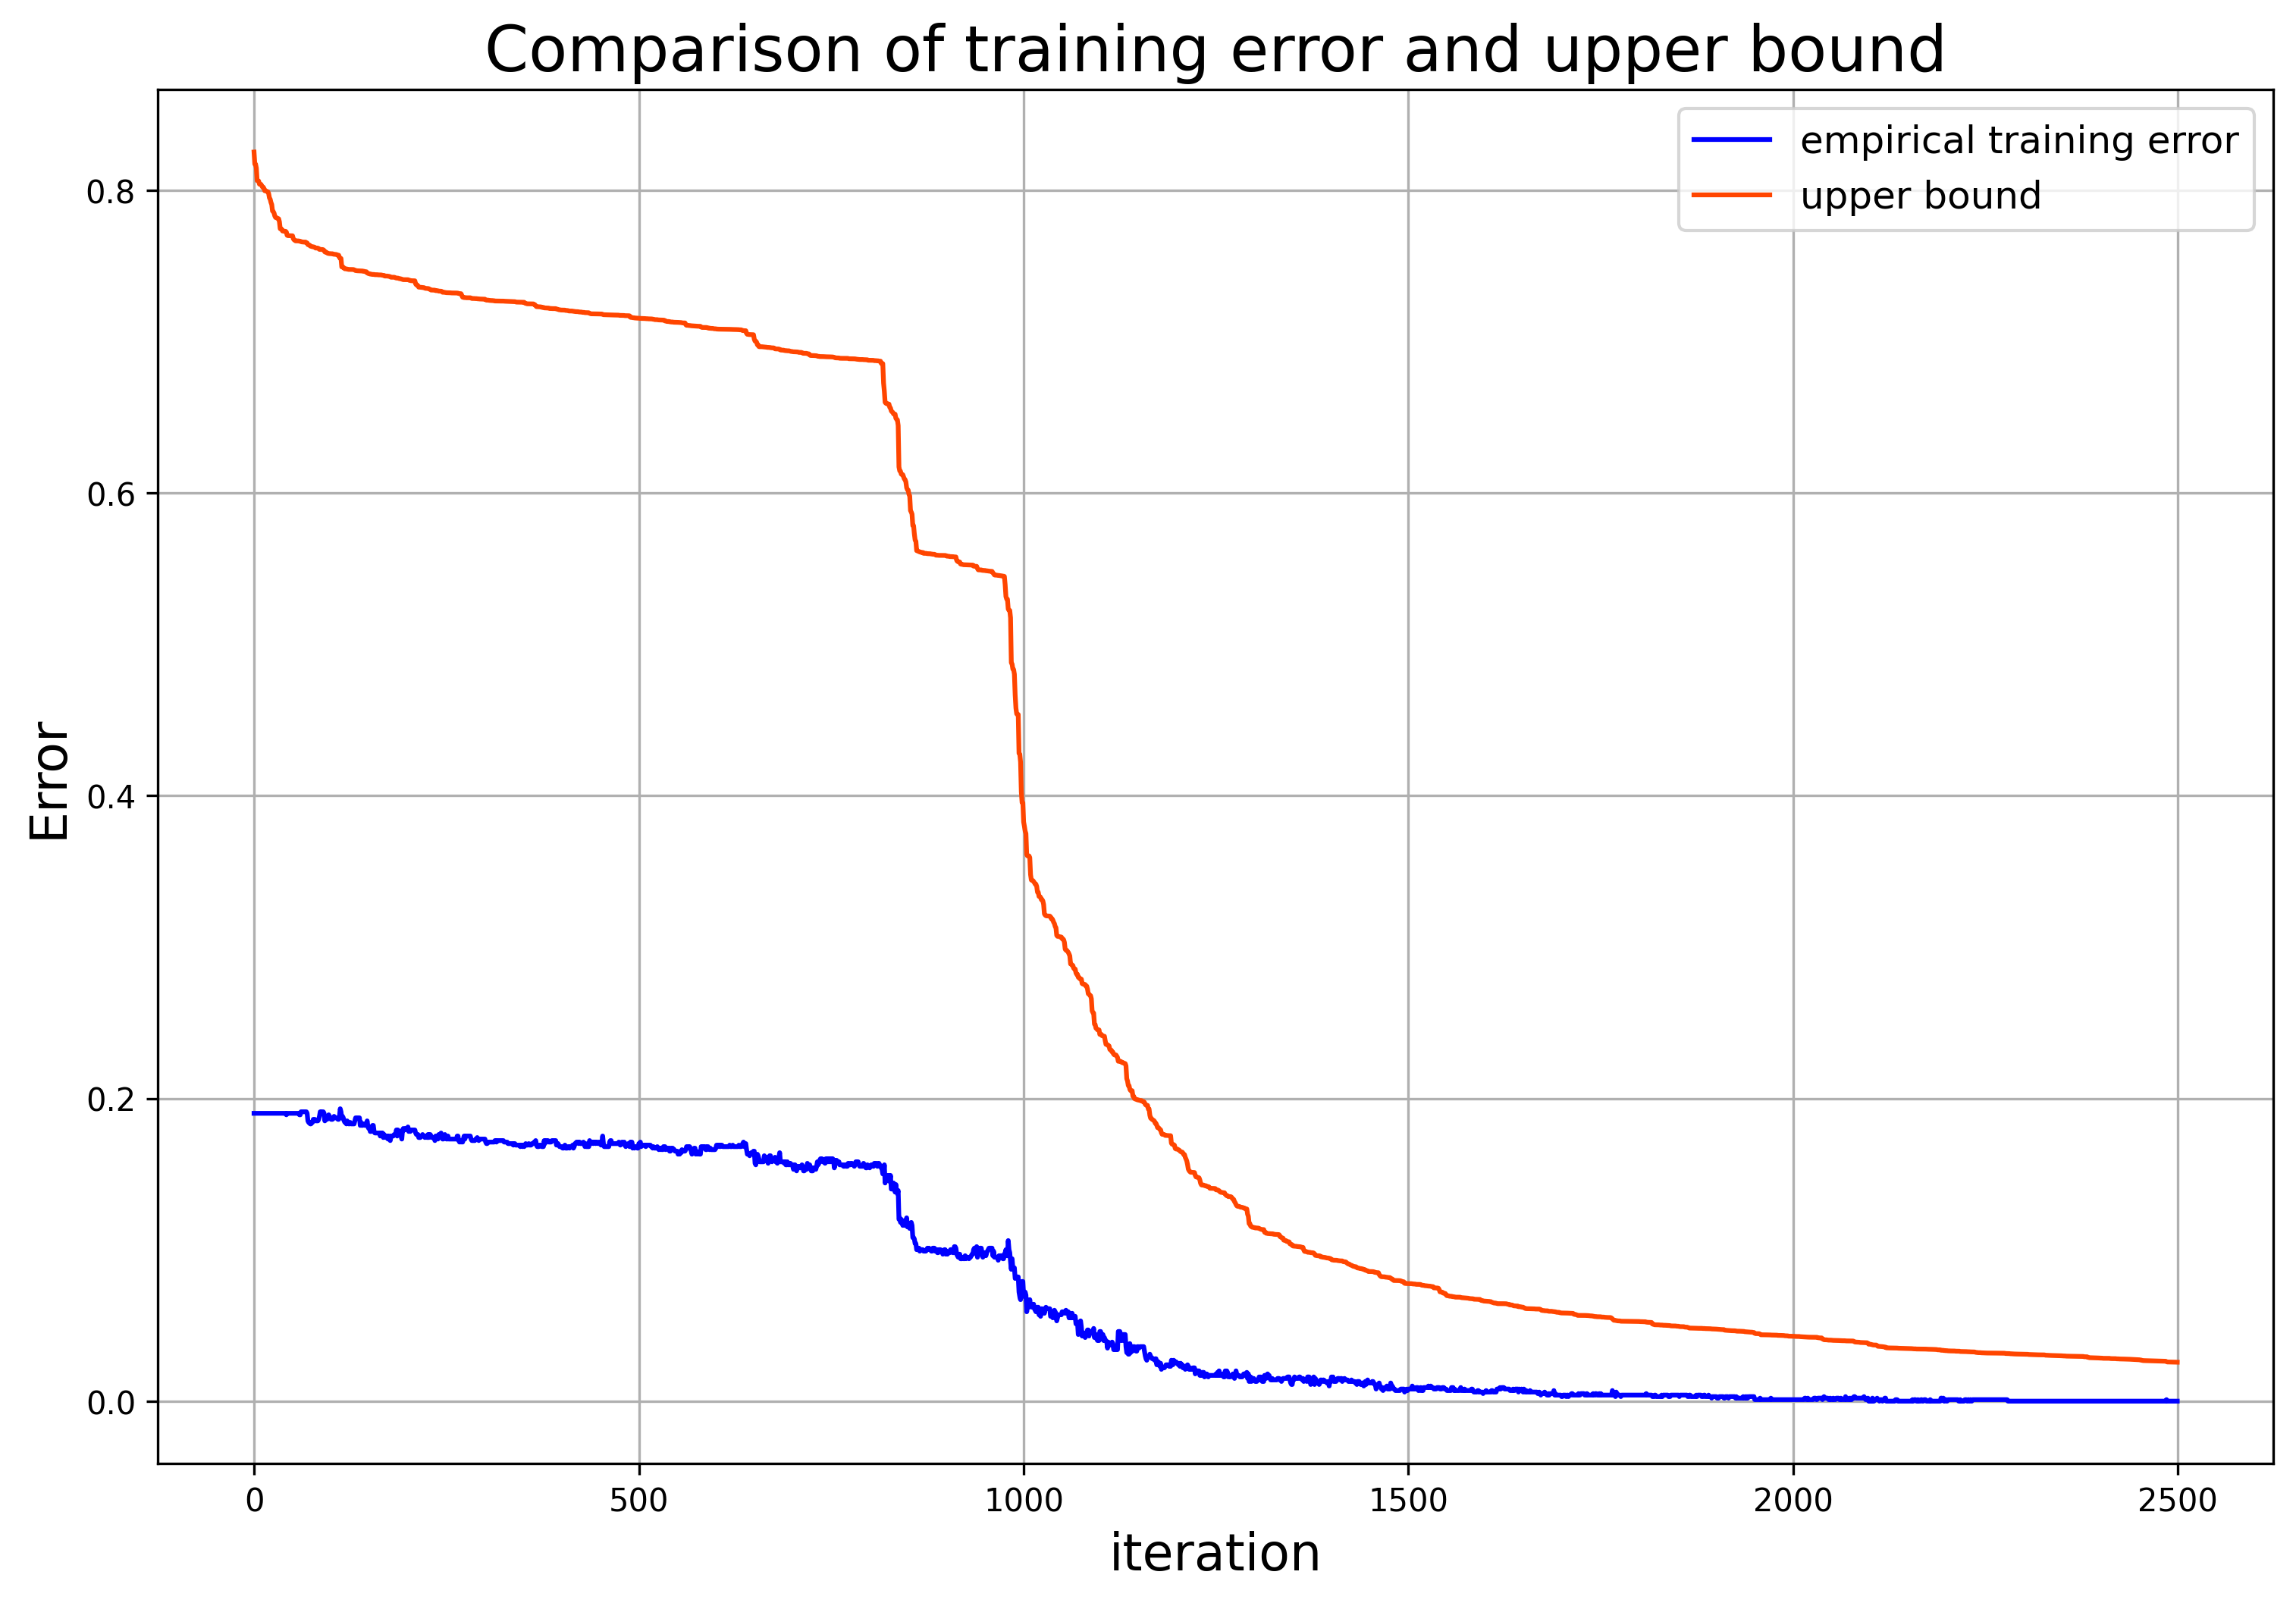

In [308]:
fig = plt.figure(figsize=(12, 8), dpi=300)
plt.plot(adaboost.training_error_list, label='empirical training error', color='blue')
plt.plot(adaboost.upper_bound_list, label='upper bound', color='orangered')
plt.grid()
plt.legend(fontsize=12)
plt.ylabel('Error', fontsize=16)
plt.xlabel('iteration', fontsize=16)
name = 'Comparison of training error and upper bound'
plt.title(name, fontsize=20)
plt.savefig(name + '.png')

## (b)

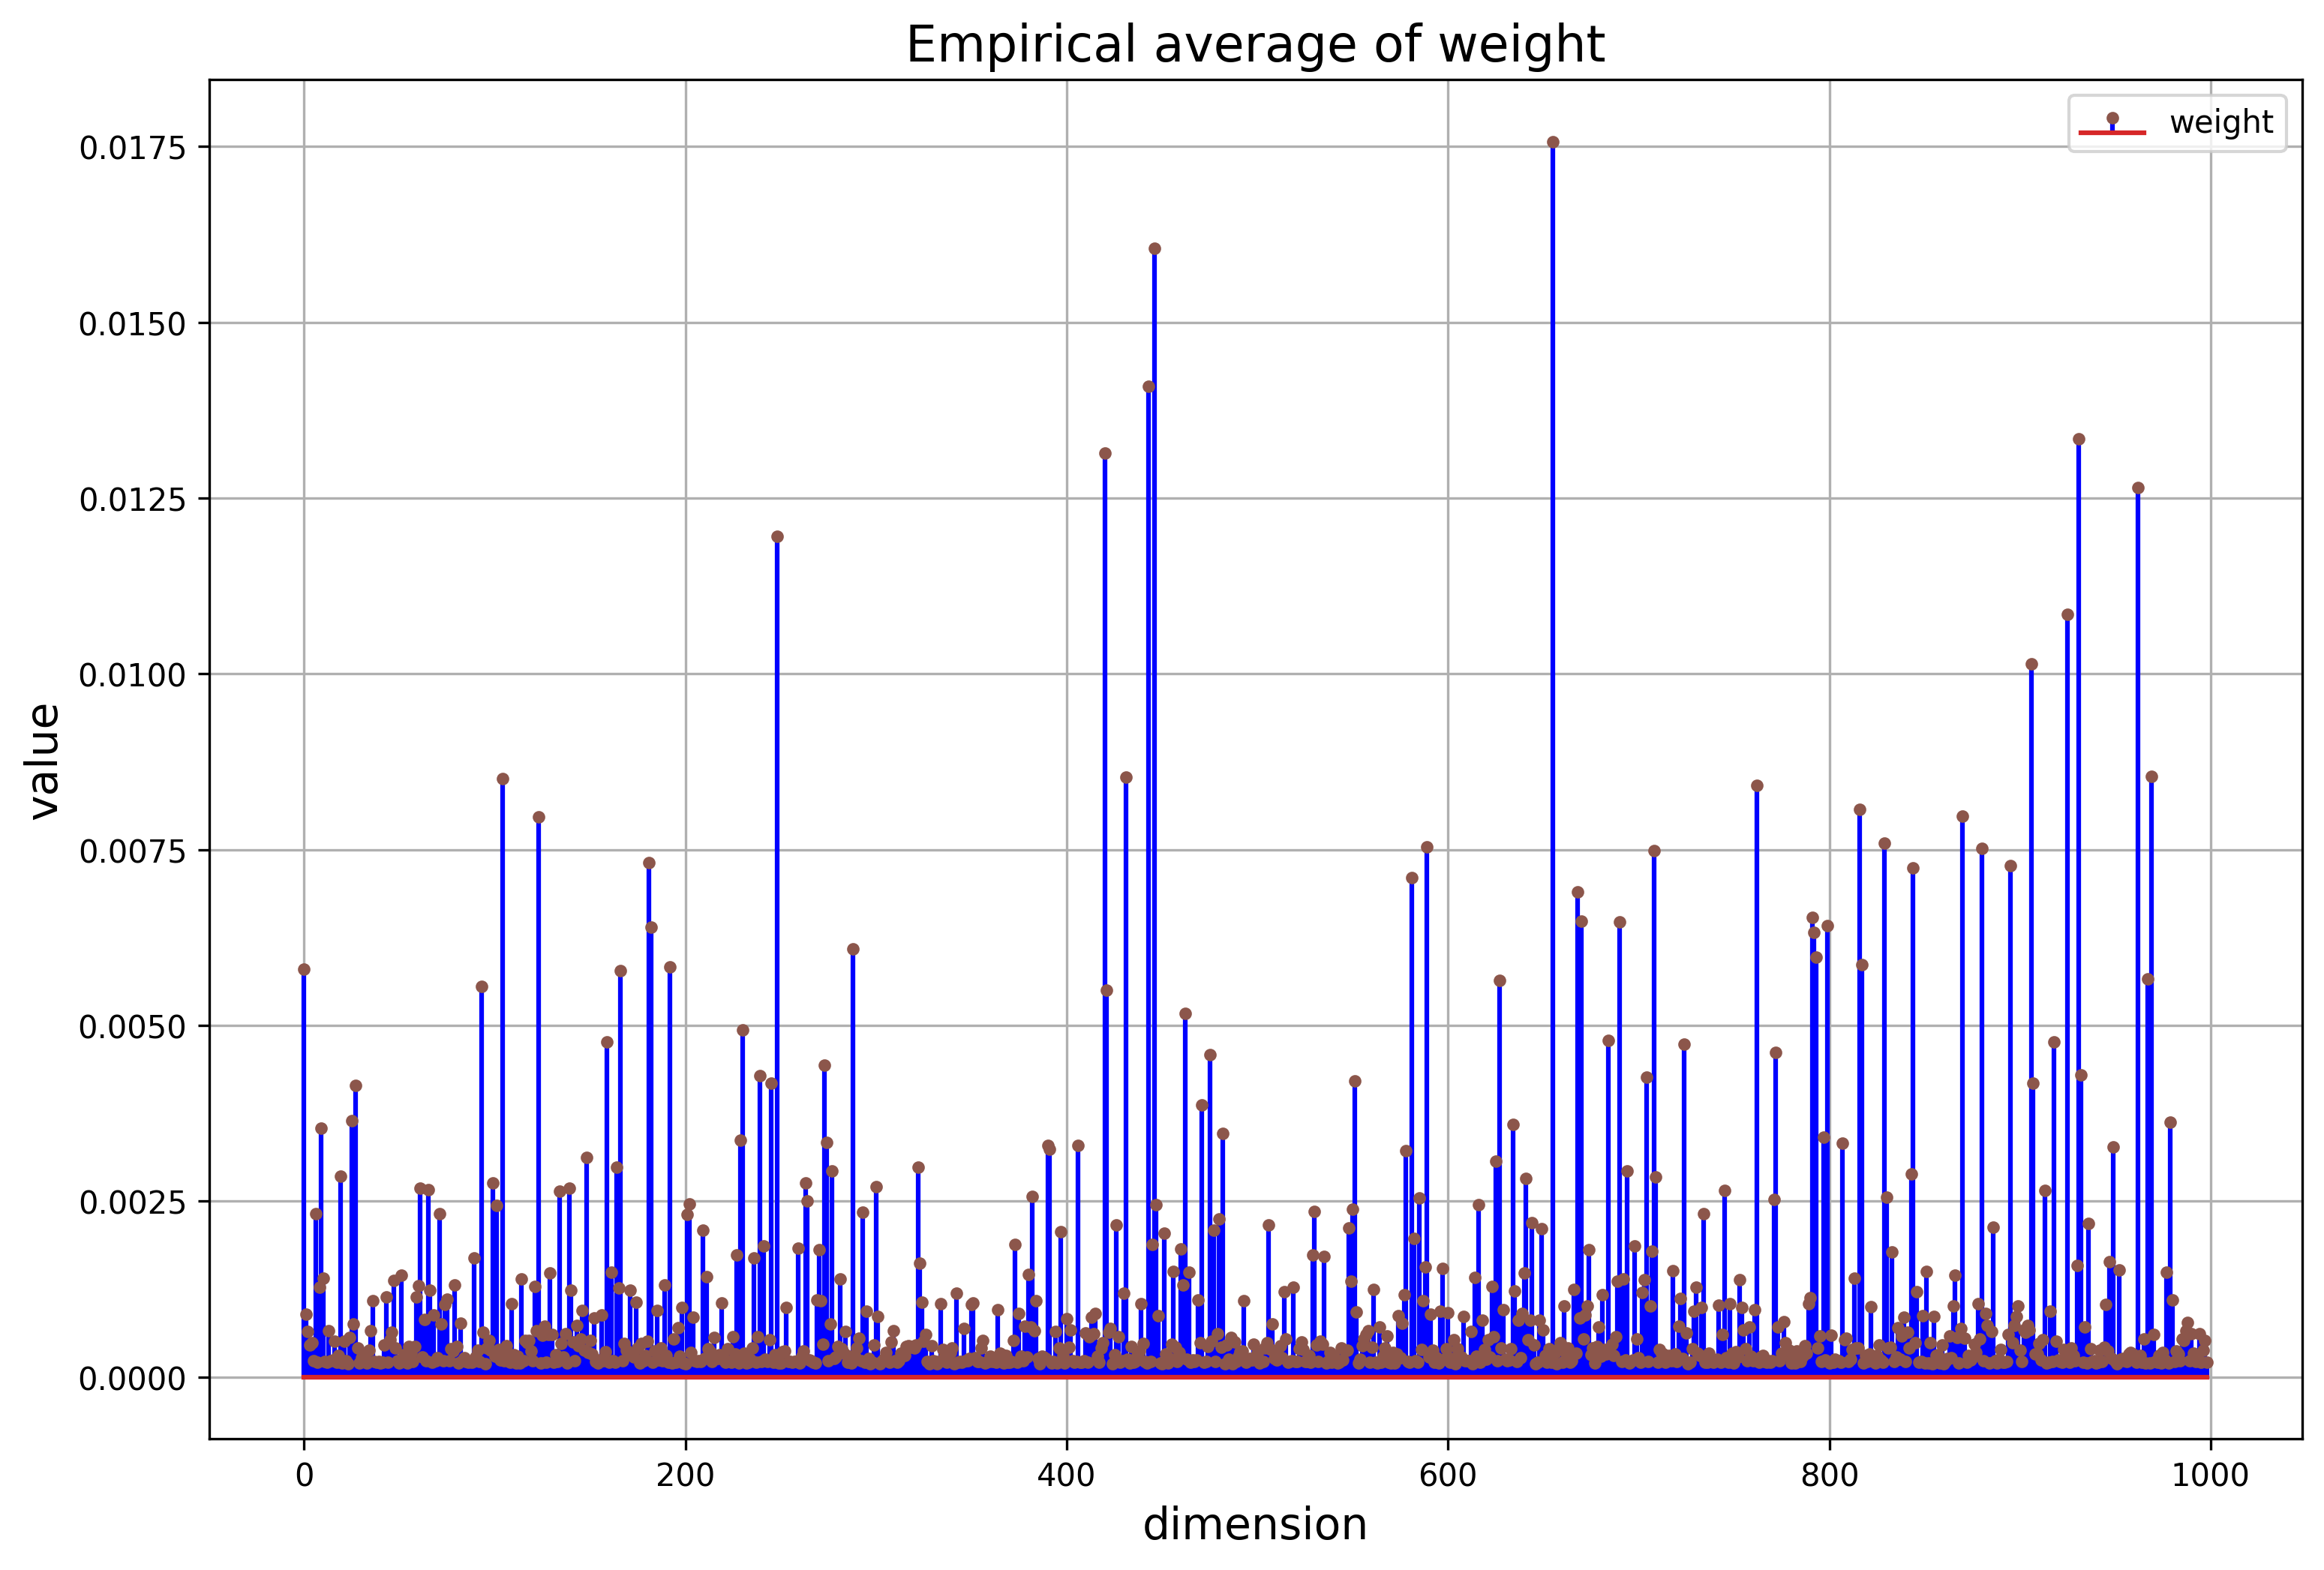

In [334]:
w_array = np.array(adaboost.weight_list).mean(axis=0)
fig = plt.figure(figsize=(12, 8), dpi=300)
plt.stem(w_array, label='weight', linefmt='blue', markerfmt='C5.')
plt.ylabel('value', fontsize=14)
plt.xlabel('dimension', fontsize=14)
plt.legend()
plt.grid()
name = 'Empirical average of weight'
plt.title(name, fontsize=16)
plt.savefig(name+'.png')

## (c)

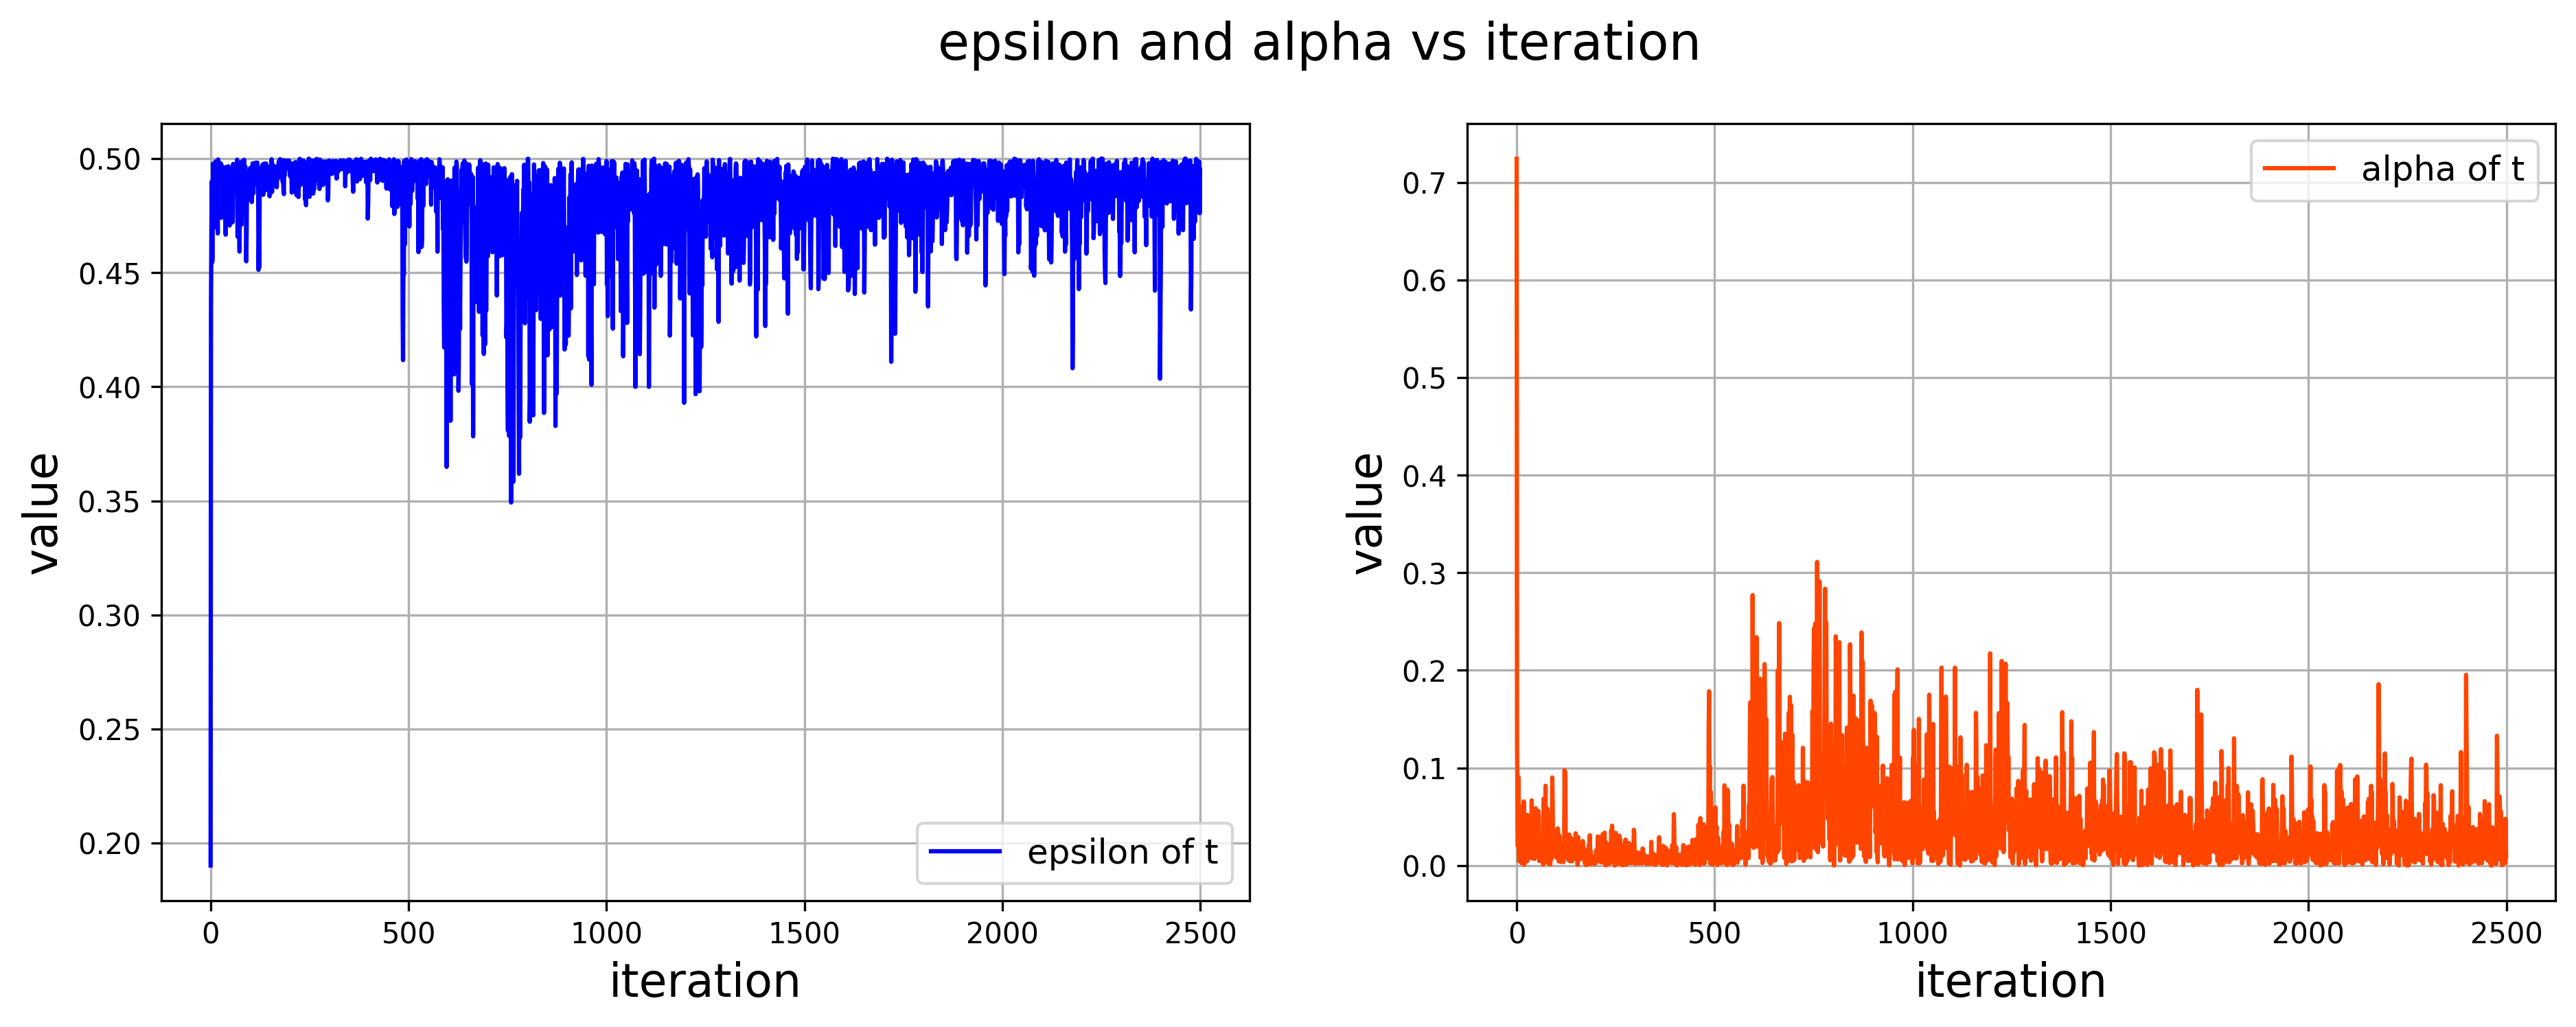

In [288]:
fig = plt.figure(figsize=(15, 5), dpi=300)
ax1 = plt.subplot(121)
plt.plot(adaboost.epsilon_list, label='epsilon of t', color='blue')
plt.grid()
plt.legend(fontsize=12)
plt.ylabel('value', fontsize=16)
plt.xlabel('iteration', fontsize=16)
ax2 = plt.subplot(122)
plt.plot(adaboost.alpha_list, label='alpha of t', color='orangered')
plt.grid()
plt.legend(fontsize=12)
plt.ylabel('value', fontsize=16)
plt.xlabel('iteration', fontsize=16)

name = 'epsilon and alpha vs iteration'
plt.suptitle(name, fontsize=18)
plt.savefig(name + '.png')

# Problem 2

In [6]:
class KMeans():
    """Implements K-means algorithm given attributes data and cluster number k.
    """
    def __init__(self, data, k):
        self.data = origin_dt
        self.n = self.data.shape[0]
        self.c = np.ones(self.n)
        self.k = k
        self.miu0 = np.random.random((self.k, 2)) * 3
        self.nk = np.ones(self.k)
        self.miu = self.miu0
        self.L_list = []
        
    def update_c(self):
        for i in range(self.n):
            self.dist = [self.cal_distance(self.data[i], self.miu[j]) for j in range(self.k)]
            self.c[i] = self.dist.index(min(self.dist))
        
    def update_miu(self):
        for i in range(self.k):
            self.nk[i] = sum(self.c == i)
            self.miu[i] = 1 / self.nk[i] * sum(self.data[j] * (self.c[j]==i) for j in range(self.n))
            
    def update_loss(self):
        self.L = sum(sum((self.c[i] == k) * self.cal_distance(self.data[i], self.miu[k]) for i in range(self.n)) for k in range(self.k))
        self.L_list.append(self.L)
        
    def cal_distance(self, p1, p2):
        return np.sqrt(sum(item**2 for item in (p1-p2)))

In [7]:
miu = np.array([[0, 0], [3, 0], [0, 3]])
sigma = np.array([[1, 0], [0, 1]])
gaussian = [np.random.multivariate_normal(miu[i], sigma, 500) for i in range(3)]
group = np.random.choice(range(3), size=500, p=[.2, .5, .3])
origin_dt = np.concatenate([gaussian[i][group==i, :] for i in range(3)])

## (a)

2 clusters made objective function converge at 734.5
3 clusters made objective function converge at 596.7
4 clusters made objective function converge at 538.3
5 clusters made objective function converge at 486.4


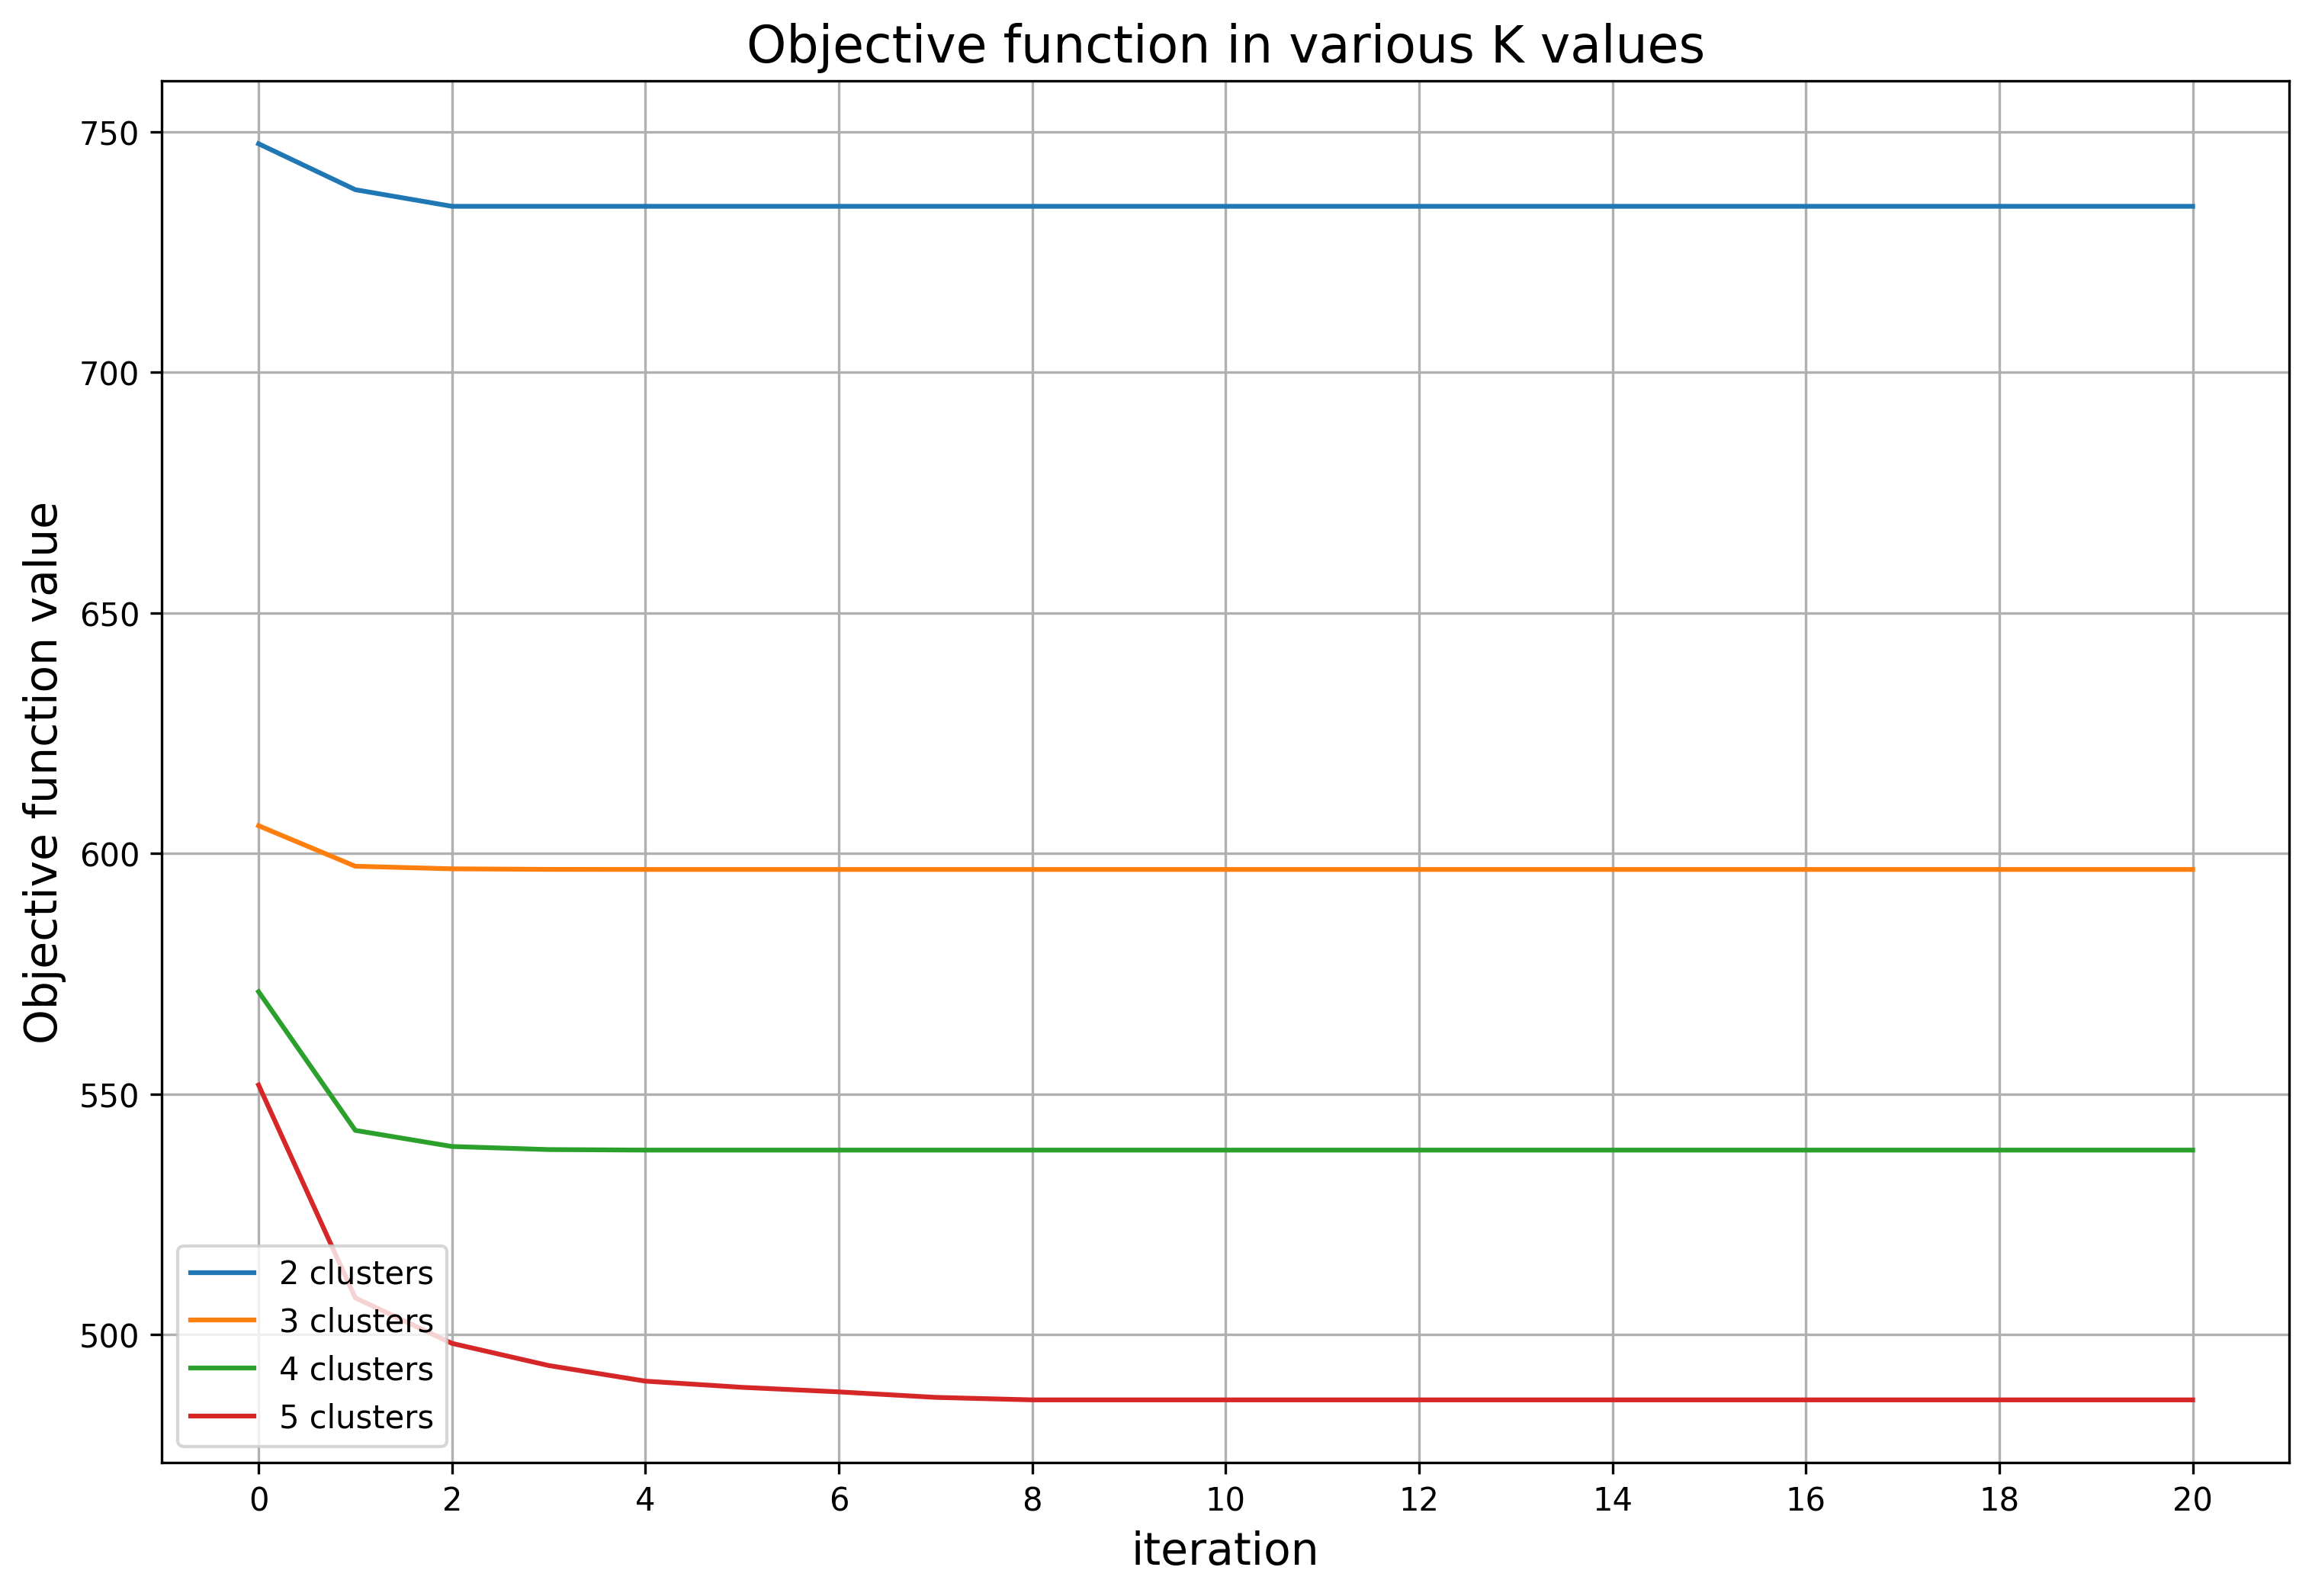

In [10]:
fig = plt.figure(figsize=(12, 8), dpi=300)
plt.ylabel('Objective function value', fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.xticks(np.arange(0,21,2), np.arange(0,21,2))
plt.grid()
name = 'Objective function in various K values'
plt.title(name, fontsize=16)
kmeans_list = []

for k in range(2, 6):
    kmeans = KMeans(origin_dt, k)
    for i in range(21):
        kmeans.update_c()
        kmeans.update_miu()
        kmeans.update_loss()
    plt.plot(kmeans.L_list, label='%d clusters'%k)
    print("%d clusters made objective function converge at %.1f" % (k, kmeans.L))
    if k in [3, 5]:
        kmeans_list.append(kmeans)
        
plt.legend()
plt.savefig(name+'.png')

## (b)

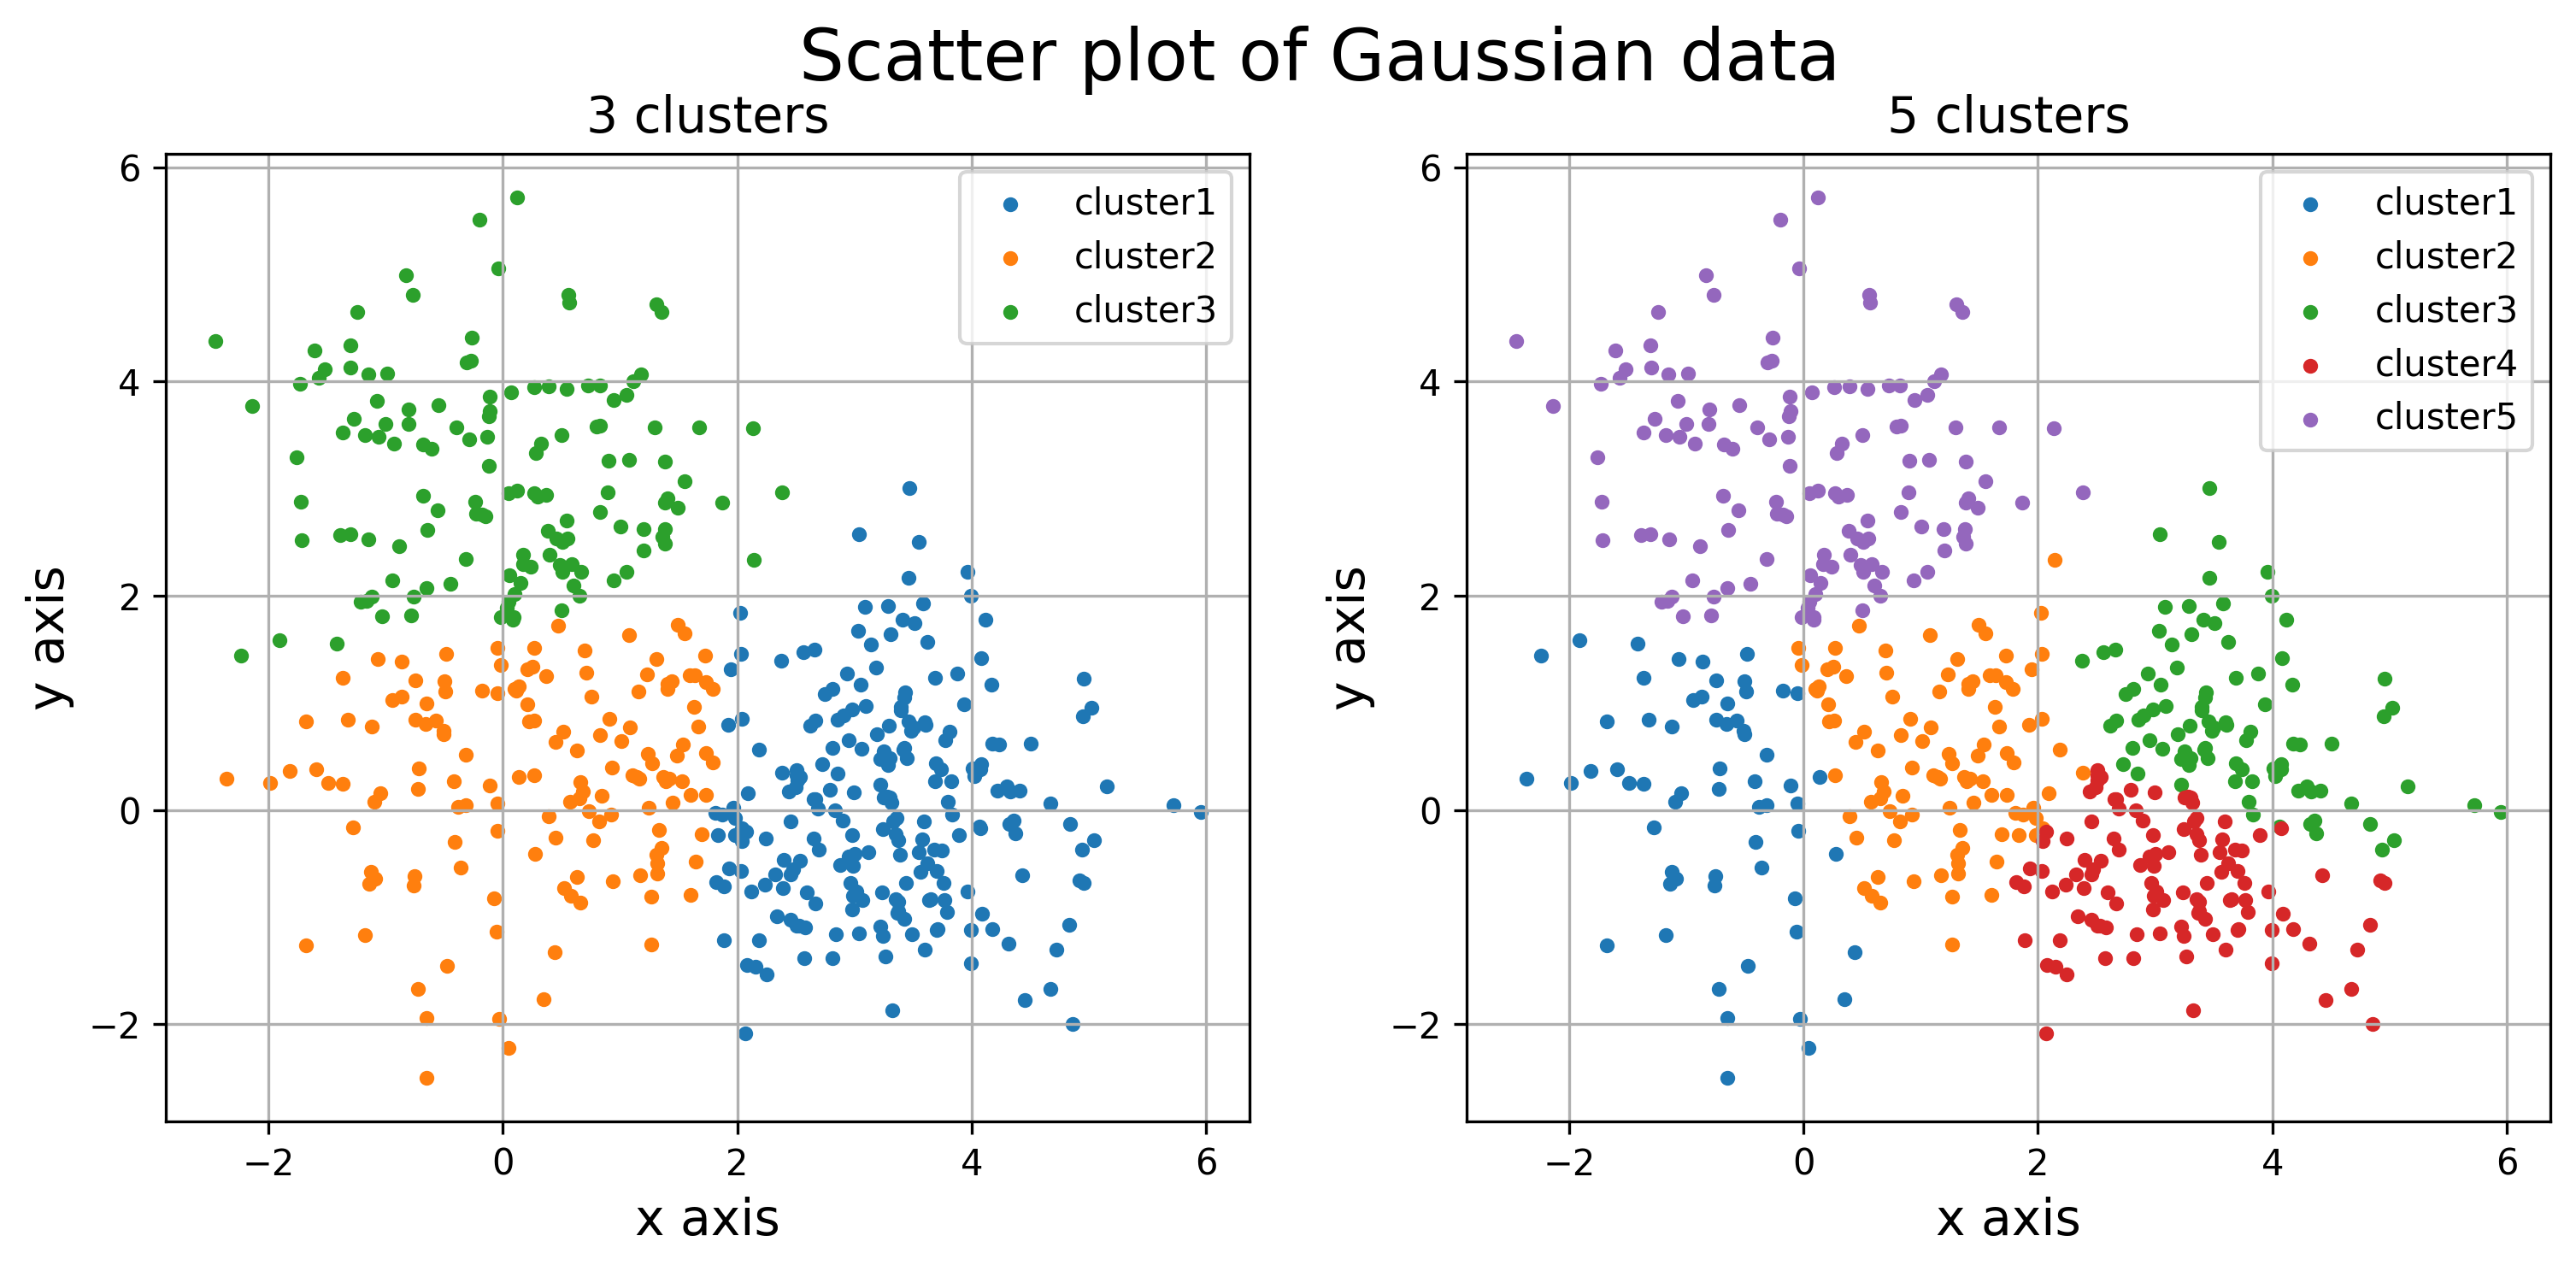

In [11]:
fig = plt.figure(figsize=(12, 5), dpi=300)
plt.subplot(121)
plt.ylabel('y axis', fontsize=14)
plt.xlabel('x axis', fontsize=14)
plt.grid()
plt.title('3 clusters', fontsize=14)
for i in range(3):
    plt.scatter(
        kmeans_list[0].data[kmeans_list[0].c==i, 0], 
        kmeans_list[0].data[kmeans_list[0].c==i, 1], 
        label='cluster'+str(i+1),
        s=10
    )
plt.legend()

plt.subplot(122)
plt.ylabel('y axis', fontsize=14)
plt.xlabel('x axis', fontsize=14)
plt.grid()
plt.title('5 clusters', fontsize=14)
for i in range(5):
    plt.scatter(
        kmeans_list[1].data[kmeans_list[1].c==i, 0], 
        kmeans_list[1].data[kmeans_list[1].c==i, 1], 
        label='cluster'+str(i+1),
        s=10
    )
plt.legend()


name = 'Scatter plot of Gaussian data'
plt.suptitle(name, fontsize=20)
plt.savefig(name+'.png')

# Problem 3

In [377]:
X_train = pd.read_csv('hw3-data/Prob3_Xtrain.csv', header=None)
y_train = pd.read_csv('hw3-data/Prob3_ytrain.csv', header=None)
X_test = pd.read_csv('hw3-data/Prob3_Xtest.csv', header=None)
y_test = pd.read_csv('hw3-data/Prob3_ytest.csv', header=None)

In [691]:
train_data = pd.concat([X_train, y_train], axis=1, sort=False)
train1 = train_data[train_data.iloc[:, -1] == 1]
train0 = train_data[train_data.iloc[:, -1] == 0]
X_train1 = train1.iloc[:, :-1]
y_train1 = train1.iloc[:, -1]
X_train0 = train0.iloc[:, :-1]
y_train0 = train0.iloc[:, -1]

In [709]:
class EM():
    """Implements EM algorithms in GMM and Bayes clssifier.
    
    Attibutes:
        data: training data in dataframe format.
        K: K-Gaussian mixture model.
        iterations: maximum iteration times.
    """
    def __init__(self, data, K, iterations=30):
        self.data = data.values
        self.K = K
        self.iterations = iterations
        self.n = self.data.shape[0]
        
    def initial(self):
        miu0 = np.array(self.data.mean(axis=0))
        self.cov = [np.cov(self.data.T)] * self.K
        self.miu = np.random.multivariate_normal(miu0, self.cov[0], self.K)
        self.pi = np.ones(self.K) / self.K
        self.phi = np.zeros((self.K, self.n))
        self.L = []
      
    def E_step(self):
        for i in range(self.K):
            self.phi[i] = multivariate_normal.pdf(self.data, self.miu[i], self.cov[i], True) * self.pi[i]    
        self.sum_phi = self.phi.sum(axis=0)
        self.phi = self.phi / self.sum_phi
        
    def M_step(self):
        self.N = self.phi.sum(axis=1)
        self.pi = self.N / self.n  
        for k in range(self.K):
            self.miu[k] = self.phi[k].dot(self.data) / self.N[k]
            self.cov[k] = np.multiply(self.phi[k].reshape(-1, 1), (self.data - self.miu[k])).T.dot(self.data - self.miu[k]) / self.N[k]
    
    def cal_obj(self):
        self.L.append(np.sum(np.log(self.sum_phi)))
            
    def GMM(self):
        self.initial()
        for _ in range(self.iterations):
            self.E_step()
            self.M_step()
            self.cal_obj()

## (a)

best ojbective function value in class 1 is: 46265.87
best ojbective function value in class 0 is: 52845.53


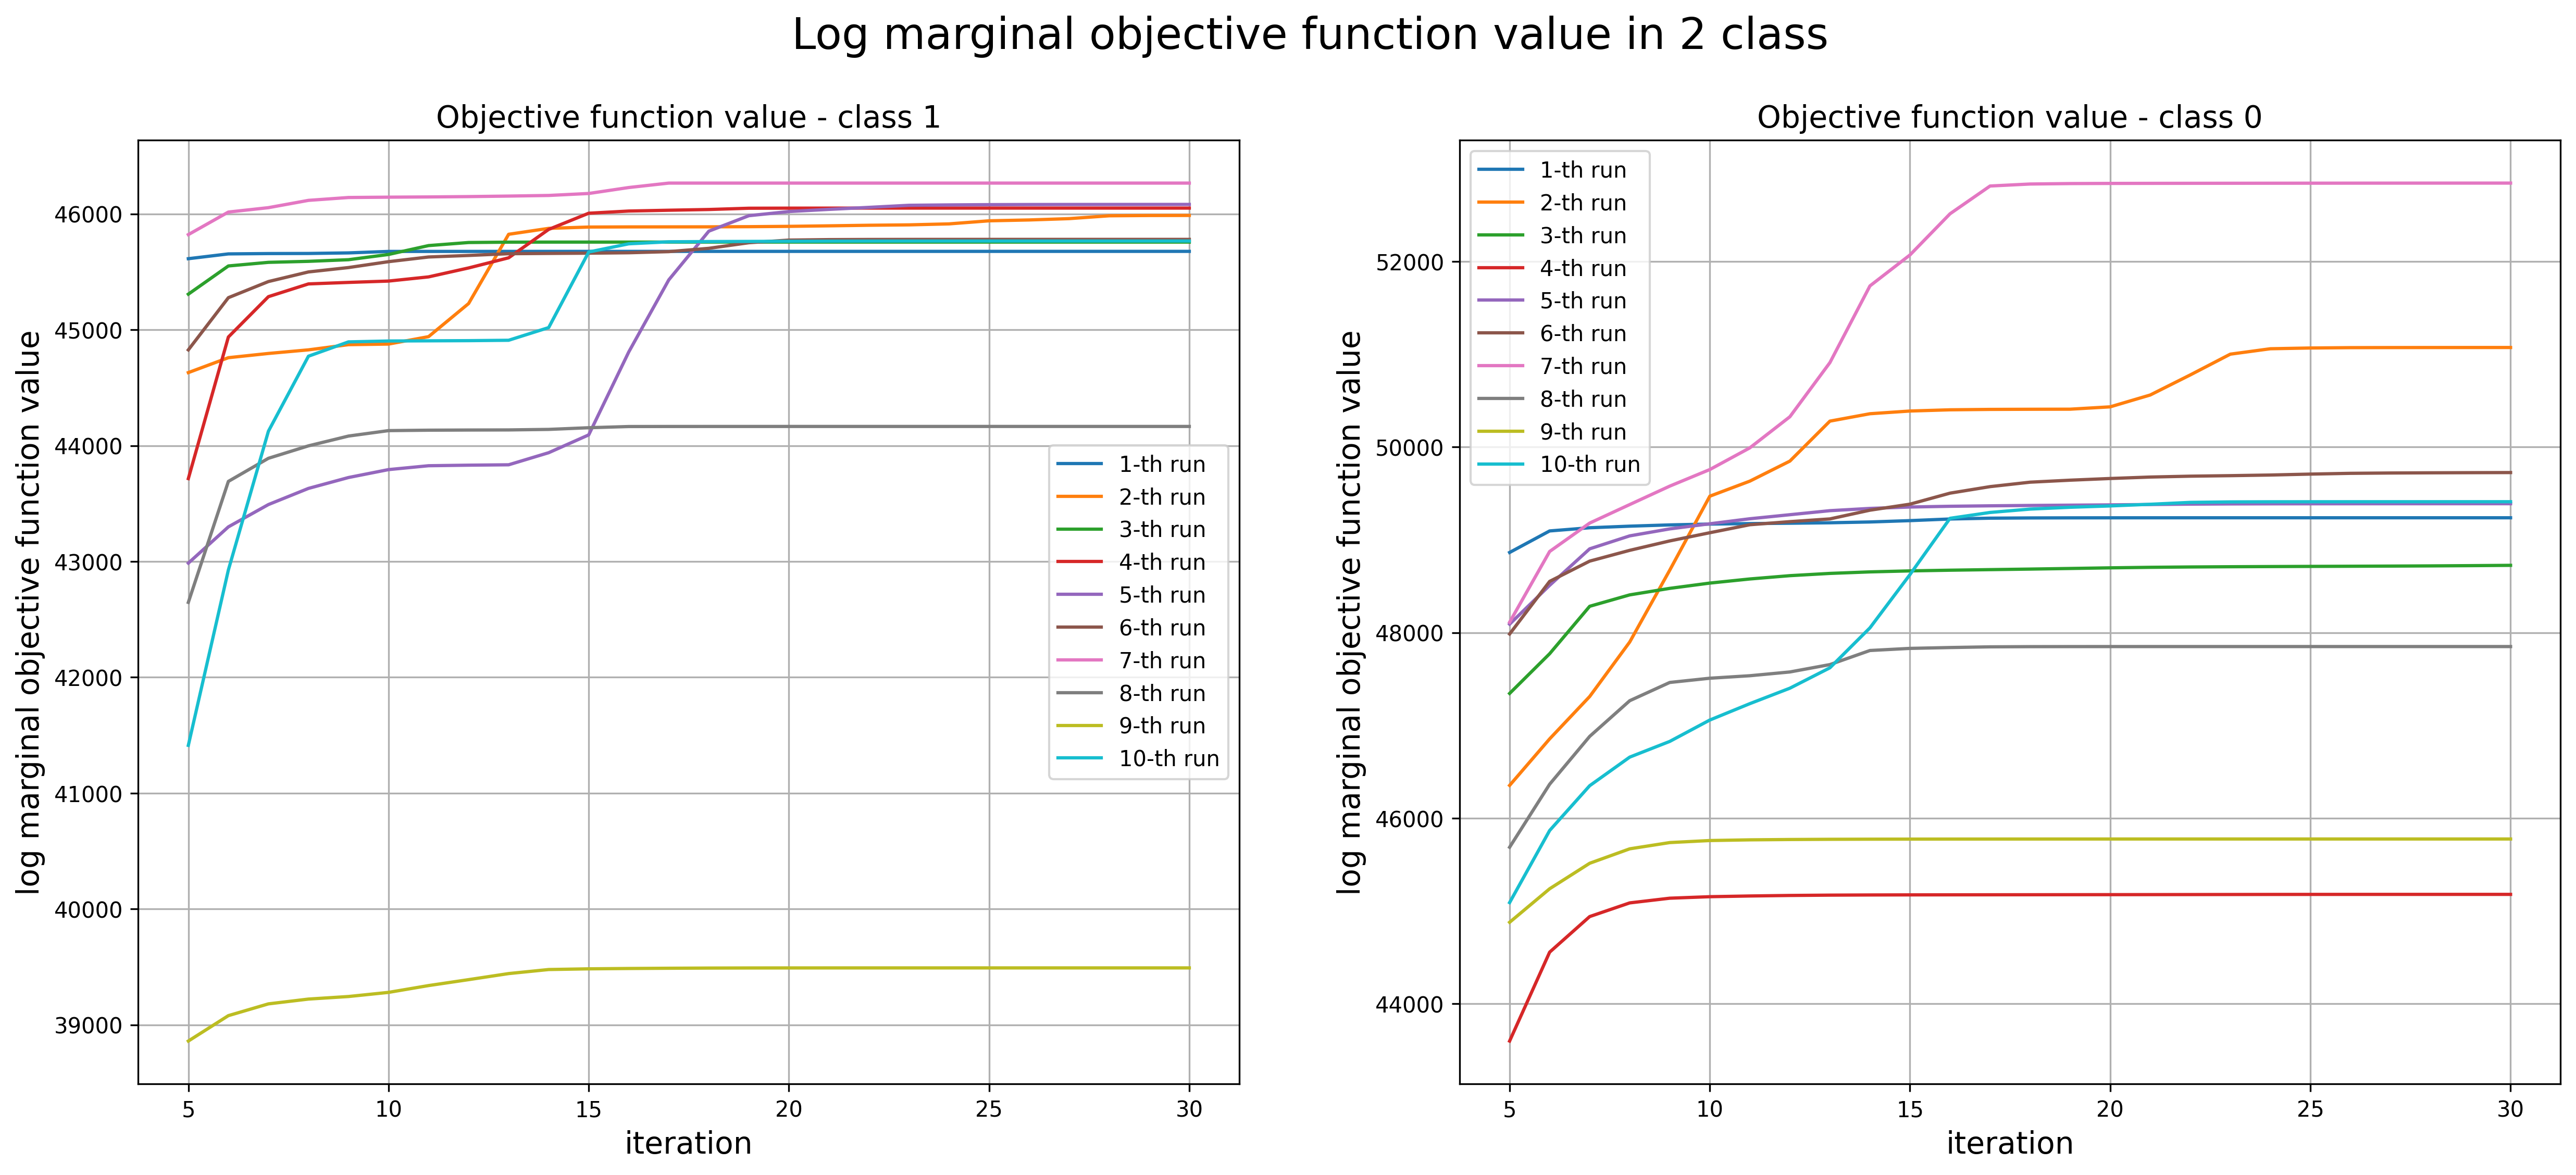

In [710]:
fig = plt.figure(figsize=(20, 8), dpi=300)
name = 'Objective function value'
ite = 30
em1_list = []
em0_list = []

plt.subplot(121)
plt.ylabel('log marginal objective function value', fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.grid()
plt.title(name+' - class 1', fontsize=14)
for times in range(10):
    em1 = EM(X_train1, 3, ite)
    em1.GMM()
    plt.plot(np.arange(5, ite+1), em1.L[4:], label='%d-th run' % (times+1))
    em1_list.append(em1)
print('best ojbective function value in class 1 is: %.2f' % max(em1_list[j].L[-1] for j in range(10)))
plt.legend()

plt.subplot(122)
plt.ylabel('log marginal objective function value', fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.grid()
plt.title(name+' - class 0', fontsize=14)
for times in range(10):
    em0 = EM(X_train0, 3, ite)
    em0.GMM()
    plt.plot(np.arange(5, ite+1), em0.L[4:], label='%d-th run' % (times+1))
    em0_list.append(em0)
print('best ojbective function value in class 0 is: %.2f' % max(em0_list[j].L[-1] for j in range(10)))
plt.legend()

supname = 'Log marginal objective function value in 2 class'
plt.suptitle(supname, fontsize=20)
plt.savefig(supname+'.png')

## (b)

In [756]:
class Bayes():
    
    def __init__(self, em1, em0, X_test, y_test):
        self.em1 = em1
        self.pi1 = em1.pi
        self.miu1 = em1.miu
        self.cov1 = em1.cov
        
        self.em0 = em0
        self.pi0 = em0.pi
        self.miu0 = em0.miu
        self.cov0 = em0.cov
        
        self.K = self.em1.miu.shape[0]
        self.X_test = X_test.values
        self.y_test = y_test.values.T[0]
        self.n = X_test.shape[0]
        
    def cal(self):
        self.phi1 = np.zeros((self.K, self.n))
        self.phi0 = np.zeros((self.K, self.n))
        for k in range(self.K):
            self.phi1[k] = multivariate_normal.pdf(self.X_test, self.miu1[k], self.cov1[k], True)
            self.phi0[k] = multivariate_normal.pdf(self.X_test, self.miu0[k], self.cov0[k], True)
        self.y_pred1 = sum(self.phi1[k] * self.pi1[k] for k in range(self.K))
        self.y_pred0 = sum(self.phi0[k] * self.pi0[k] for k in range(self.K))
        
    def predict(self):
        self.y_pred = np.zeros(self.n)
        for i in range(self.n):
            self.y_pred[i] = np.argmax([self.y_pred0[i], self.y_pred1[i]])
            
    def test(self):
        self.cross_tab = np.zeros((2, 2))
        for p in [0, 1]:
            for q in [0, 1]:
                self.cross_tab[p][q] = sum([(self.y_test[i]==p) & (self.y_pred[i]==q) for i in range(self.n)])  
        

In [744]:
def find_pos(li):
    max_L = 0
    pos = 0
    for i, item in enumerate(li):
        if max_L < item.L[-1]:
            max_L = item.L[-1]
            pos = i
    return li[pos]

In [745]:
em1_best = find_pos(em1_list)
em0_best = find_pos(em0_list)

In [757]:
bayes = Bayes(em1_best, em0_best, X_test, y_test)
bayes.cal()
bayes.predict()
bayes.test()
print(bayes.cross_tab)
print("Accuracy is %.2f" % ((bayes.cross_tab[0][0] + bayes.cross_tab[1][1]) / sum(sum(bayes.cross_tab))))

[[205.  73.]
 [ 10. 172.]]
Accuracy is 0.82


In [758]:
def k_gaussian(K, ite, X_train, y_train, X_test, y_test):
    train_data = pd.concat([X_train, y_train], axis=1, sort=False)
    train1 = train_data[train_data.iloc[:, -1] == 1]
    train0 = train_data[train_data.iloc[:, -1] == 0]
    X_train1 = train1.iloc[:, :-1]
    y_train1 = train1.iloc[:, -1]
    X_train0 = train0.iloc[:, :-1]
    y_train0 = train0.iloc[:, -1]
    em1_list = []
    em0_list = []
  
    for times in range(10):
        em1 = EM(X_train1, K, ite)
        em1.GMM()
        em1_list.append(em1)
            
        em0 = EM(X_train0, K, ite)
        em0.GMM()
        em0_list.append(em0)
    
    em1_best = find_pos(em1_list)
    em0_best = find_pos(em0_list)
    
    bayes = Bayes(em1_best, em0_best, X_test, y_test)
    bayes.cal()
    bayes.predict()
    bayes.test()
    print(bayes.cross_tab)
    print("Accuracy is %.2f" % ((bayes.cross_tab[0][0] + bayes.cross_tab[1][1]) / sum(sum(bayes.cross_tab))))

In [760]:
for i in range(1, 5):
    k_gaussian(i, 30, X_train, y_train, X_test, y_test)

[[180.  98.]
 [  6. 176.]]
Accuracy is 0.77
[[191.  87.]
 [  8. 174.]]
Accuracy is 0.79
[[196.  82.]
 [ 11. 171.]]
Accuracy is 0.80
[[209.  69.]
 [ 10. 172.]]
Accuracy is 0.83
